In [1]:
import numpy as np

from dipoleq import Machine

In [3]:
from pip import main as pipmain
pipmain(['install', 'matplotlib', 'pyyaml'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting matplotlib

Downloading matplotlib-3.9.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)

Collecting pyyaml

Using cached PyYAML-6.0.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)

Collecting contourpy>=1.0.1 (from matplotlib)

Downloading contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)

Collecting cycler>=0.10 (from matplotlib)

Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)

Collecting fonttools>=4.22.0 (from matplotlib)

Downloading fonttools-4.51.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (159 kB)

/Users/garnier/sb/dipoleq/.venv/lib/python3.12/site-packages/pip/_vendor/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Collecting kiwisolver>=1.3.1 (from matplotlib)

Downloading kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)

Requirement already satisfied: numpy>=1.23 in /Users/garnier/sb/dipoleq/.venv/lib/python3.12/site-packages (from matplotlib) (1.26.4)

Requirement already satisfied: packaging>=20.0 in /Users/garnier/sb/dipoleq/.venv/lib/python3.12/site-packages (from matplotlib) (24.0)

Collecting pillow>=8 (from matplotlib)

Downloading pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)

Collecting pyparsing>=2.3.1 (from matplotlib)

Downloading pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)

Requirement already satisfied: python-dateutil>=2.7 in /Users/garnier/sb/dipoleq/.venv/lib/python3.12/site-packages (from matplotlib) (2.9.0.post0)

Requirement already satisfied: six>=1.5 in /Users/garnier/sb/dipoleq/.venv/lib/python3.12/site-packages (from python-dateutil>=2.7->matplotlib) (1.16.0)

Downloading matplotlib-3.9.0-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)

Using cached PyYAML-6.0.1-cp312-cp312-macosx_11_0_arm64.whl (165 kB)

Downloading contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)

Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)

Downloading fonttools-4.51.0-cp312-cp312-macosx_10_9_universal2.whl (2.8 MB)

Downloading kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)

Downloading pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)

Downloading pyparsing-3.1.2-py3-none-any.whl (103 kB)

Installing collected packages: pyyaml, pyparsing, pillow, kiwisolver, fonttools, cycler, contourpy, matplotlib

Successfully installed contourpy-1.2.1 cycler-0.12.1 fonttools-4.51.0 kiwisolver-1.4.5 matplotlib-3.9.0 pillow-10.3.0 pyparsing-3.1.2 pyyaml-6.0.1

0

In [2]:
m = Machine.from_file("tests/beta1.yaml")
m.solve()

INFO:	Initializing current to 0.001 (A).
INFO:	Finding LH Greens....
		[Bot]
		[In]
		[Out]
INFO:	Finding Coil Boundary Greens...
		[F1_Coil]
		[F2_Coil]
		[F3_Coil]
		[L_Coil]
		[H_U]
		[H_L]
		[C_Coil]
INFO:	Computing Psi boundary.
INFO:	Solving Grad-Shafranov Equation.
		[After 6 iterations, MaxRes=8.62098e-05]
		[BoundErr = 1]
INFO:	Solving Grad-Shafranov Equation.
		[After 6 iterations, MaxRes=9.23993e-06]
INFO:	Plasma Boundary.
		[PsiMin found at (X = 0.345, Z = -0.005) Psi = -1.30151]
		[Sep  found at (X = 0.999, Z = 1.265) Psi = -0.165056]
		[Axis found at (X = 0.350, Z = -0.000) Psi = -1.30419]
		[PsiLim = -0.165056, PsiAxis = -0.535894]
INFO:	FindJ
		[Ip = 20607.5 (A)]
INFO:	Computing Psi boundary.
INFO:	Solving Grad-Shafranov Equation.
		[After 6 iterations, MaxRes=1.84277e-05]
		[BoundErr = 0.0369289]
INFO:	Solving Grad-Shafranov Equation.
		[After 4 iterations, MaxRes=1.25009e-06]
INFO:	Plasma Boundary.
		[PsiMin found at (X = 0.345, Z = -0.005) Psi = -1.30556]
		[Sep  fou

In [3]:
R = np.array(m.PsiGrid.R)
Z = np.array(m.PsiGrid.Z)
Psi = np.array(m.PsiGrid.Psi)
Br = np.array(m.Plasma.GradPsiZ)/(2*np.pi*R)
Bz = -np.array(m.Plasma.GradPsiR)/(2*np.pi*R)

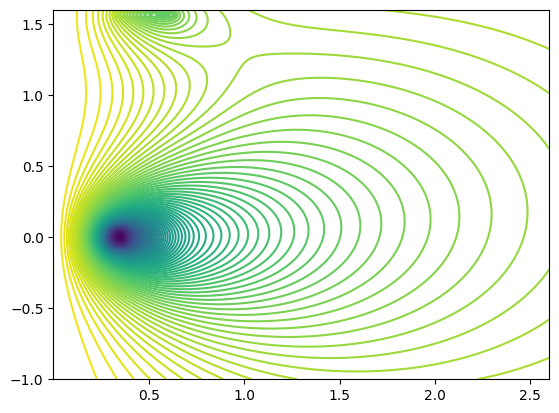

In [5]:
import matplotlib.pyplot as plt
plt.contour(R, Z, Psi, 100)

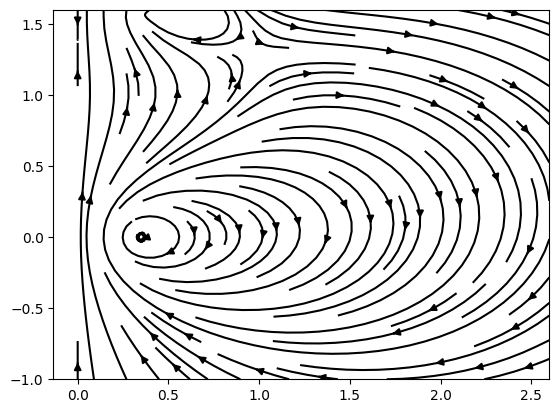

In [6]:
plt.streamplot(R, Z, Br, Bz, color='k')